# 导入工具包

In [51]:
# mediapipe人工智能工具包
import mediapipe as mp
# opencv-python
import cv2
# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

# 导入模型

In [52]:
# import solution
mp_pose = mp.solutions.pose
# drawing_utils
mp_drawing = mp.solutions.drawing_utils
# guide the model
pose = mp_pose.Pose(static_image_mode=True,         # static image or video
                    model_complexity=2,             # choose the complexity of model [0,2]
                    smooth_landmarks=True,          # Whether to smooth key points
                    enable_segmentation=True,      # Is the human body keying
                    min_detection_confidence=0.5,   # Confidence threshold
                    min_tracking_confidence=0.5)    # tracking confidence threshold


# 定义可视化图像函数

In [53]:
# BGR(cv2) -> RGB(plt)
def show_image(img):
    img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 读入图像

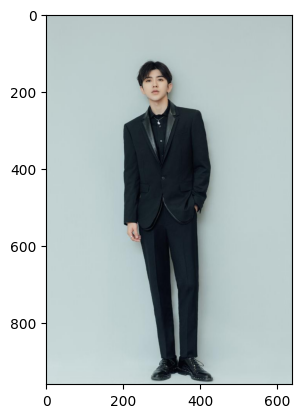

In [54]:
img = cv2.imread('../datasets/example/kun.png')
show_image(img)

# 图像输入模型

In [55]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = pose.process(img_RGB)

# 人体抠图结果

In [56]:
mask = results.segmentation_mask
mask.shape

(960, 640)

In [57]:
img.shape

(960, 640, 3)

In [58]:
mask

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3717273e-12,
        1.3493915e-12, 1.3498254e-12],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5046519e-12,
        1.4820971e-12, 1.4619258e-12],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.4738895e-12,
        1.4620161e-12, 1.4512304e-12],
       ...,
       [5.9544898e-14, 5.7366147e-14, 5.5026221e-14, ..., 3.2451958e-10,
        4.8374826e-10, 6.4770034e-10],
       [5.9766597e-14, 5.7436735e-14, 5.5129820e-14, ..., 2.6994060e-09,
        2.3081794e-09, 2.3219264e-09],
       [6.0026670e-14, 5.7545704e-14, 5.5169519e-14, ..., 5.2682525e-09,
        4.1707584e-09, 4.0343000e-09]], dtype=float32)

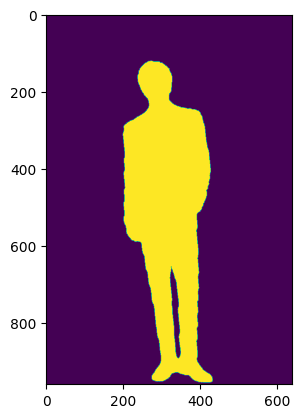

In [59]:
mask = mask > 0.5
plt.imshow(mask)
plt.show()

In [60]:
import numpy as np
# 单通道转三通道
mask_3 = np.stack((mask,mask,mask), axis=-1)

MASK_COLOR = [0,200,0]
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

# 获得前景人像
FG_img = np.where(mask_3, img, fg_image)

# 获得扣掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

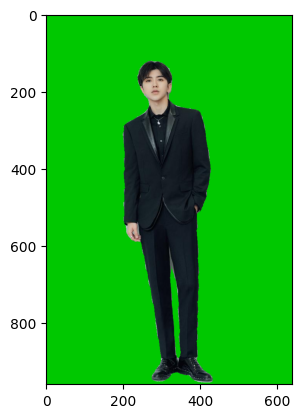

In [61]:
show_image(FG_img)

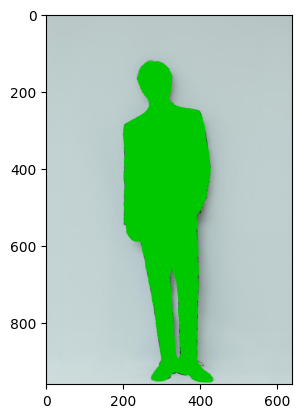

In [62]:
show_image(BG_img)

# 所有关键点检测结果

In [63]:
results.pose_landmarks

landmark {
  x: 0.4429768919944763
  y: 0.19597163796424866
  z: -0.5701836943626404
  visibility: 0.9999352693557739
}
landmark {
  x: 0.455894410610199
  y: 0.17855718731880188
  z: -0.5303030014038086
  visibility: 0.9998651742935181
}
landmark {
  x: 0.46619194746017456
  y: 0.17828664183616638
  z: -0.5309817790985107
  visibility: 0.9998400211334229
}
landmark {
  x: 0.47274741530418396
  y: 0.17835678160190582
  z: -0.5309743881225586
  visibility: 0.9998952150344849
}
landmark {
  x: 0.4269813597202301
  y: 0.1818484663963318
  z: -0.5246246457099915
  visibility: 0.9999037981033325
}
landmark {
  x: 0.41873764991760254
  y: 0.18354502320289612
  z: -0.5254013538360596
  visibility: 0.9999048709869385
}
landmark {
  x: 0.41086381673812866
  y: 0.18546758592128754
  z: -0.5257846117019653
  visibility: 0.9999251365661621
}
landmark {
  x: 0.48707395792007446
  y: 0.18730634450912476
  z: -0.2831803858280182
  visibility: 0.9999114274978638
}
landmark {
  x: 0.4010698199272156
  

In [64]:
mp_pose.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [65]:
# 左胳膊肘的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.6389073133468628
y: 0.40561172366142273
z: -0.195548415184021
visibility: 0.9883154630661011

In [66]:
# 左胳膊肘的归一化坐标
results.pose_landmarks.landmark[13]

x: 0.6389073133468628
y: 0.40561172366142273
z: -0.195548415184021
visibility: 0.9883154630661011

# 解析指定关键点的像素坐标

In [67]:
img.shape

(960, 640, 3)

In [68]:
h = img.shape[0]
w = img.shape[1]

In [69]:
# 左胳膊肘的像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x * w

408.9006805419922

In [70]:
# 左胳膊肘的像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y * h

389.3872547149658

# 解析指定关键点的真实物理（米）坐标

In [71]:
results.pose_world_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.18284018337726593
y: -0.27958551049232483
z: -0.09641699492931366
visibility: 0.9883154630661011

In [72]:
results.pose_world_landmarks.landmark[13]

x: 0.18284018337726593
y: -0.27958551049232483
z: -0.09641699492931366
visibility: 0.9883154630661011

# 交互式三维可视化

In [73]:
coords = np.array(results.pose_landmarks.landmark)
coords

array([x: 0.4429768919944763
       y: 0.19597163796424866
       z: -0.5701836943626404
       visibility: 0.9999352693557739, x: 0.455894410610199
                                       y: 0.17855718731880188
                                       z: -0.5303030014038086
                                       visibility: 0.9998651742935181,
       x: 0.46619194746017456
       y: 0.17828664183616638
       z: -0.5309817790985107
       visibility: 0.9998400211334229, x: 0.47274741530418396
                                       y: 0.17835678160190582
                                       z: -0.5309743881225586
                                       visibility: 0.9998952150344849,
       x: 0.4269813597202301
       y: 0.1818484663963318
       z: -0.5246246457099915
       visibility: 0.9999037981033325, x: 0.41873764991760254
                                       y: 0.18354502320289612
                                       z: -0.5254013538360596
                                   

In [74]:
len(coords)

33

In [75]:
coords[0].x

0.4429768919944763

In [76]:
# 在不用耗时循环的条件下，汇总所有点的XYZ坐标

def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

# 分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points = np.vstack((points_x, points_y, points_z)).T

In [77]:
points.shape

(33, 3)

In [78]:
points

array([[ 0.44297689,  0.19597164, -0.57018369],
       [ 0.45589441,  0.17855719, -0.530303  ],
       [ 0.46619195,  0.17828664, -0.53098178],
       [ 0.47274742,  0.17835678, -0.53097439],
       [ 0.42698136,  0.18184847, -0.52462465],
       [ 0.41873765,  0.18354502, -0.52540135],
       [ 0.41086382,  0.18546759, -0.52578461],
       [ 0.48707396,  0.18730634, -0.28318039],
       [ 0.40106982,  0.1942922 , -0.25186577],
       [ 0.46634451,  0.21099159, -0.47053146],
       [ 0.43002099,  0.21340486, -0.46645588],
       [ 0.58809674,  0.28161961, -0.14050956],
       [ 0.35468441,  0.31055433, -0.06458619],
       [ 0.63890731,  0.40561172, -0.19554842],
       [ 0.35923943,  0.4437792 , -0.05074462],
       [ 0.61785954,  0.49461037, -0.57924128],
       [ 0.34725362,  0.55092227, -0.36020914],
       [ 0.61254948,  0.52526385, -0.68578762],
       [ 0.3455959 ,  0.58526736, -0.45250192],
       [ 0.59409899,  0.52016503, -0.74886036],
       [ 0.35180306,  0.5850665 , -0.535

In [82]:
import open3d
point_cloud = open3d.geometry.PointCloud()
point_cloud.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_cloud])